# 1 - Exploratory Data Analysis

## Elements of Structured Data

### Key Terms for Data Types

- **_Continuous:_** Data that can take on any value in an interval
    - **Synonyms:** interval, float, numeric
- **_Discrete:_** Data that can take on only integer values, such as counts
    - **Synonyms:** integer, count
- **_Categorical:_** Data that can take on only a specific set of values representing a set of possible categories
    - **Synonyms:** enums, enumerated, factors, nominal, polychotomous
- **_Binary:_** A special case of categorical data with just two categories of values (0/1, true/false)
    - **Synonyms:** dichotomous, logical, indicator, boolean
- **_Ordinal:_** Categorical Data that has an explicit ordering
    - **Synonyms:** ordered factor
    
### Key Ideas

- Data is typically classified in software by type
- Data types include numeric (continuous, discrete) and categorical (binary, ordinal)
- Data typing in software acts s a signal to the software on how to process the data
    
## Rectangular Data

### Key Terms for Rectangular Data

- **_Dataframe:_** Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine learning models
- **_Feature:_** A column in the table is commonly referred to as a _feature_
    - **Synonyms:** attribute, input, predictor, variable
- **_Outcome:_** Many data science projects involve predicting an _outcome_ - often a yes/no outcome (In table 1.1 it is 'auction was competitive or not').  The _features_ are sometimes used to predict the outcome in an experiment or study
    - **Synonyms:** dependent variable, response, target, output


|Category          |Currency|sellerRating|Duration|endDay|closePrice|openPrice|Competitive?|
|------------------|--------|------------|--------|------|----------|---------|------------|
|Music/ Movie/ Game|US      |3249        |5       |Mon   |0.01      |0.01     |0           |
|Music/ Movie/ Game|US      |3249        |5       |Mon   |0.01      |0.01     |0           |
|Automotive        |US      |3115        |7       |Tue   |0.01      |0.01     |0           |
|Automotive        |US      |3115        |7       |Tue   |0.01      |0.01     |0           |
|Automotive        |US      |3115        |7       |Tue   |0.01      |0.01     |0           |
|Automotive        |US      |3115        |7       |Tue   |0.01      |0.01     |0           |
|Automotive        |US      |3115        |7       |Tue   |0.01      |0.01     |1           |
|Automotive        |US      |3115        |7       |Tue   |0.01      |0.01     |1           |

Table 1.1: Sample Data

## Estimates of Location

Location can also be throught of as central tendency, where does the "typical" value lay?

### Key Terms for Estimates of Location

- **_Mean:_** The sum of all values divided by the number of values
    - **Synonyms:** average
- **_Weighted Mean:_** The sum of all values times a weight divided by the sum of the weights
    - **Synonyms:** weighted average
- **_Median:_** The value such that one half of the data lies above and below
    - **Synonyms:** 50th Percentile
- **_Percentile:_** The value such that P percent of the data lies below
    - **Synonyms:** quantile
- **_Weighted Median:_** The value such that one-half of the sum of the weights lies above and below the sorted data
- **_Trimmed Mean:_** The average of all values after dropping a fixed number of extreme values
    - **Synonyms:** truncated mean

**_Mean_**

The mean represents the average - it's not a terribly robust estimate, however you can use a trimmed or weighted mean to improve resistance to outliers.

$$\overline{x} = \mu = \frac{\sum_{i}^{n}x_{i}}{n}$$

**_Trimmed Mean_**

$$\overline{x}_{t} = x = \frac{\sum_{i = p + 1}^{n - p}x_{i}}{n - 2p}$$

**_Weighted Mean_**

$$\overline{x}_{w} = \frac{\sum_{i = 1}^{n}w_{i}x_{i}}{\sum_{i}^{n}w_{i}}$$

### Robust Metrics

Median, trimmed and weighted mean are resistant to outliers - ...

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles

state = pd.read_csv('../data/state.csv')

# Population

population_x_bar = np.mean(state['Population'])
population_x_bar_t = trim_mean(state['Population'], 0.1)
population_x_med = np.median(state['Population'])

# Murder Rate

murder_rate_x_bar = np.mean(state['Murder.Rate'])
murder_rate_x_bar_t = trim_mean(state['Murder.Rate'], 0.1)
murder_rate_x_bar_wt = np.average(state['Murder.Rate'], 
                                  weights=state['Population'])
murder_rate_x_med = np.median(state['Murder.Rate'])
murder_rate_x_med_w = wquantiles.median(state['Murder.Rate'], 
                                        weights=state['Population'])

# -----------------------------------
# Summary Output - Location Estimates
# -----------------------------------

print('Population Metrics')
print('-'*30,'\n')
print(f'Mean: {population_x_bar:,.0f}')
print(f'Trimmed Mean: {population_x_bar_t:,.0f}')
print(f'Median: {population_x_med:,.0f}\n')

print('Murder Rate Metrics')
print('-'*30,'\n')
print(f'Mean: {murder_rate_x_bar:,.2f}')
print(f'Trimmed Mean: {murder_rate_x_bar_wt:,.3f}')
print(f'Weighted Mean: {murder_rate_x_bar_wt:,.5f}')
print(f'Median: {murder_rate_x_med:,.3f}')
print(f'Weighted Median: {murder_rate_x_med_w:,.3f}')

Population Metrics
------------------------------ 

Mean: 6,162,876
Trimmed Mean: 4,783,697
Median: 4,436,370

Murder Rate Metrics
------------------------------ 

Mean: 4.07
Trimmed Mean: 4.446
Weighted Mean: 4.44583
Median: 4.000
Weighted Median: 4.400


### Key Ideas

- The basic metric for location is the mean, but it can be sensitive to extreme values (outliers)
- Other metrics (median, trimmed mean) are less sensitive to outliers and unusual distributions, hence more robust

### Further Reading

[Wikipedia: Central Tendency](https://en.wikipedia.org/wiki/Central_tendency)  
John Tukey - _Exploratory Data Analysis_ 1977 Pearson

## Estimates of Variability

Variability measures disperion around the middle (central tendency).  Part of statistics is understanding random vs. real variability.

### Key Terms for Variability Metrics
- **_Deviations:_** The difference between the observed value and the estimate of location
    - **Synonyms:** errors, residuals
- **_Variance:_** The sum of squared deviations from the mean divided by $n - 1$, where $n$ is the number of observations
    - **Synonyms:** mean-squared-error
- **_Standard Deviation:_** The square root of the variance
    - **Synonyms:** l1-norm, Euclidean norm
- **_Mean Absolute Deviation:_** The mean of the absolute deviations from the mean
    - **Synonyms:** l2-norm, Manhattan norm
- **_Median Absolute Deviation from the Median:_** The median of the absolute values of the deviations from the median
- **_Range:_** The difference between the largest and the smallest values in a dataset
- **_Order Statistics:_** Metrics based on the data values ordered from smallest to largest
    - **Synonyms:** ranks
- **_Percentile:_** The value such that P-percent take on this value or less and (100 - P) take on this value or more
    - **Synonyms:** quantile
- **_Interquartile Range:_** The difference between the 75th and 25th percentile
    - **Synonyms:** IQR
    
### Standard Deviation and Related Estimates

Since the sum of all deviations is zero, there are corrections to the data that need to be made to get meaningful measures of dispersion.

#### Mean Absolute Deviation

Using the absolute deviations eliminates the offset of the positive and negative deviations:

$$\text{Mean Absolution Deviation} = \frac{\sum_{i=1}^{n}\left|x_i - \overline{x}\right|}{n}$$

#### Variance and Standard Deviation

These are two of the most widely used measures of variability - squaring the deviations eliminates the positive/negative offset:

$$\text{Variance} = s^2 = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{n-1}$$  
$$\text{Standard Deviation} = s = \sqrt{\text{Variance}}$$  
The standard deviation is easy to work with since it's on the same scale as the measure in question

> **Degrees of Freedom - $n$ vs. $n - 1$:**
> The use of $n - 1$ vs $n$ in calulcating standard deviation comes from the concept of degrees of freedom.  The estimate of variance without using degrees of freedom results in what's called a biased estimate.  This is because there is a constraint placed on the calulation of the estimate of variance - namely, you have already estimated the mean.  This means that you have one fewer degree of freedom in the system because of this constraint.  Hence, dividing by $n - 1$ yields what we call the _unbiased estimator_.

**Variance**, **Standard Deviation**, and **Mean Absolute Deviation** are not robust estimates - they are all sensitive to outliers, especially variance and SD since they use squared deviations.


In [4]:
# -------------------------------------
# Variance Measures
# -------------------------------------

# Calculations

population_sd = np.std(state['Population'])

# Output

print('Population - Variability')
print('-'*30,'\n')
print(f'Standard Deviation: {population_sd:,.3f}')


Population - Variability
------------------------------ 

Standard Deviation: 6,779,407.115


A robust estimate of variability is the Median Absolute Deviation:

$$\text{Median Absolute Deviation} = Median(\left|x_1 - m\right|, \left|x_2 - m\right|, ..., \left|x_n - m\right|)$$

### Estimates based on Percentiles

Percentiles are a form of order statistics.  For large datasets this can be computationally very expensive operation because the data needs to be sorted to perform it.  Some packages will use algorithms that can quickly calculate an approximate value.

For the set $\{3,1,5,3,6,7,2,9\}$, we can sort the data to get the ordered set $\{1,2,3,4,5,6,7,8,9\}$ and yield the following statistics:
- The 25th percentile is 2.5
- The 75th percentile is 6.5
- The IQR is $6.5-2.5 = 4$

> **Percentile: Precise Definition**  
> If we have an even number of data ($n$ is even), then the percentile is ambiguous under the preceding definition. In fact, we could take on any value between order statistics $x_{(j)}$ and $x_{(j+1)}$ where $j$ satisfies:  
> $$100 * \frac{j}{n} \leq P \leq 100 * \frac{j+1}{n}$$
> Formally, the percentile is the weighted average:  
> $$\text{Percentile}(P) = (1-w)x_{(J)}+wx_{j+1)}$$  
> for some weight $w$ between 0 and 1.  Statistical software has slightly different approaches to choosing $w$.  In fact, the _R_ function `quantile` offers nine different alternatives to compute the quantile.  Except for small datasets, you don't need to worry about how the quantile is calculated.  _Python's_ `numpy.quantile` only supports linear interpolation.

In [12]:
from statsmodels.robust.scale import mad
population_iqr = state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
population_mad = mad(state['Population'])

print(f'Intequartile Range: {population_iqr:,.2f}')
print(f'Median Absolute Deviation: {population_mad:,.2f}')

Intequartile Range: 4,847,308.00
Median Absolute Deviation: 3,849,876.15


### Key Ideas

- The variance and standard deviation are the most widespread and routinely reported statistics of variability
- Both are sensitive to outliers
- More robust metrics include mean and median absolute deviations from the mean and percentiles

### Further Reading

[David Lane's Percentiles](http://onlinestatbook.com/2/introduction/percentiles.html)  
[_R-bloggers_ on Deviations from Mean](http://www.r-bloggers.com/absolute-deviation-around-the-median/)

## Exploring the Data Distribution

It's useful to look at the distribution overall, in addition to one single measure of loction or dispersion.

### Key Terms for Exploring the Distribution

- **_Boxplot:_** A plot introduced by Tukey as a quick way to vizualize the distribution of data
    - **Synonyms:** box and whisker plot
- **_Frequency Table:_** A tally of the count of numeric data values that fall into a set of intervals (bins)
- **_Histogram:_** A plot of the frequency table with the bins on the x-axis and the counts (or proportions) on the y-axis.  While visually similar, they should not be confused with histograms.  See ["Exploring Binary and Categorical Data"](https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/ch01.html#ExploringBinaryCategoricalData) for a discussion of the difference
- **_Density Plot:_** A smoothed version of the histogram, often based on the _kernel density estimate_

In [13]:
# Quantiles

state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

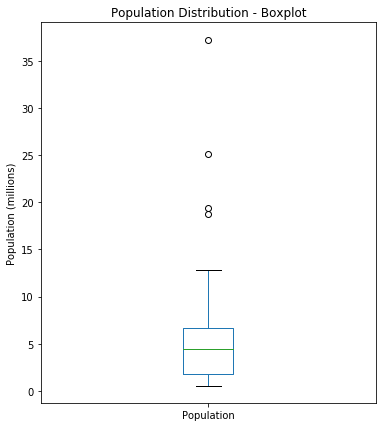

In [83]:
import matplotlib.pyplot as plt

ax = (state['Population']/1_000_000).plot.box(figsize = (6, 7))
ax.set_ylabel('Population (millions)')
ax.set_title('Population Distribution - Boxplot');

We can see the 25 and 75 quantiles match with the borders of the box - the 50th matches the middle of the box.  The ends of the whiskers stop at the most extreme value or 1.5 times the IQR, whichever comes first.

### Frequency Tables and Histograms

We can use the `pandas` function `cut` to build a frequency table, which shows the interval as the value, and we can use `value_counts` to build out the freq table:

In [52]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts(sort=False)

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
(33584923.0, 37253956.0]     1
Name: Population, dtype: int64

The next visualization is a histogram - bins that are empty are plotted as empty space within the visualization.  The top bin, which has only one state (California) is similar to what we see in the frequency table.

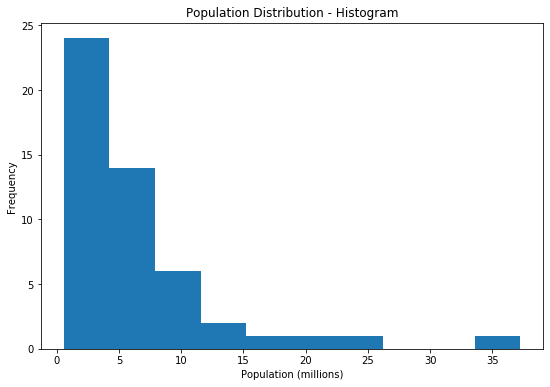

In [79]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(9, 6))
ax.set_xlabel('Population (millions)')
ax.set_title('Population Distribution - Histogram');

> **Statistical Moments**  
> In statistical theory, location and variability are referred to as the first and second _moments_ of the distribution.  The third and fourth moments of the distribution are called _skewness_ and _kurtosis_.  Skewness refers to whether the data is skewed to larger or smaller numbers and kurtosis indicates the propensity of the data to have extreme values.  Generally, metrics are not used to measure this, but rather visualizations  
>  
> For defined distibutions such as exponential, gamma, etc., the moments can be calculated

### Density Plots and Estimates

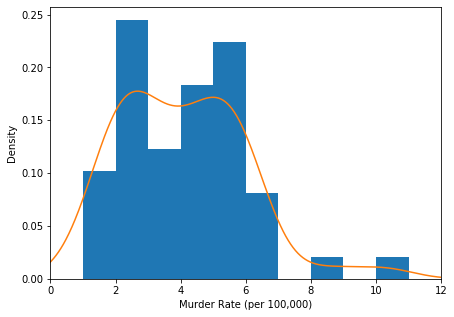

In [75]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12), figsize=(7,5))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)');

Densities are related to proportions.  The sum of the area under the curve is 1.  For the proportion between two values you take the are under the curve between two points.

> **Density Estimation**  
> Density Estimation is a rich topic with a long history in statisticl literature.  In fact, over 20 _R_ packages have been published that offer functions for density estimation. [ _Deng-Wickham 2011_ ] give a comprehensive review of _R_ packages with a particular recommendation for `ASH` or `KernSmooth`.  The density estimation methods in `pandas` and `scikit-learn` also offer good implementations.  For many data science problems, there is no need to worry about the various types of density estimates; it suffices to use the base functions.

### Key Ideas

- A frequency histogram plots frequency counts on the y-axis and the variable values on the x-axis; it gives a sense of the distribution of the data at a glance
- A frequency table is a tabular version of the frequency counts found in a histogram
- A boxplot - with the top and bottom of the box at the 75th and 25th percentiles, respectively - also gives a quick sense of the distribution of the data; it is often used in side-by-side displays to compare distributions
- A density plot is a smoothed version of a histogram; it requires a function to estimate the plot based on the data (multiple estimates are possible)

### Further Reading

- A SUNY Oswego professor provides a [step-by-step guide to creating a boxplot](http://www.oswego.edu/~srp/stats/bp_con.htm).
- Density estimation in R is covered in [Henry Deng and Hadley Wickham’s paper of the same name](http://vita.had.co.nz/papers/density-estimation.pdf).
- R-Bloggers has a [useful post on histograms in R](http://www.r-bloggers.com/basics-of-histograms/), including customization elements, such as binning (breaks)
- R-Bloggers also has [similar post](http://www.r-bloggers.com/box-plot-with-r-tutorial/) on boxplots in R.
- Matthew Conlen published an [interactive presentation](https://mathisonian.github.io/kde/) that demonstrates the effect of choosing different kernels and bandwidth on kernel density estimates.

## Exploring Binary and Categorical Data

### Key Terms for Exploring Categorical Data

- **_Mode:_** The most commonly occurring category or value in a dataset
- **_Expected Value:_** When the categories can be associated with a numeric value, this gives an average value based on the categories liklihood of occurence
- **_Bar Charts:_** The frequency or proportion of each category plotted on bars
- **_Pie Charts:_** The frequency or proportion of each category plotted as wedges in a pie

We can look at a tablular representation of the proportion of delays at Dallas-Ft. Worth Airport by cause:

In [130]:
AIRPORT_DELAYS_CSV = '../data/dfw_airline.csv'
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)

print((100 * dfw / dfw.values.sum()).to_markdown())

|    |   Carrier |     ATC |   Weather |   Security |   Inbound |
|---:|----------:|--------:|----------:|-----------:|----------:|
|  0 |    23.023 | 30.4008 |   4.02521 |   0.122937 |   42.4281 |


And here we can see the representation in a bar chart:

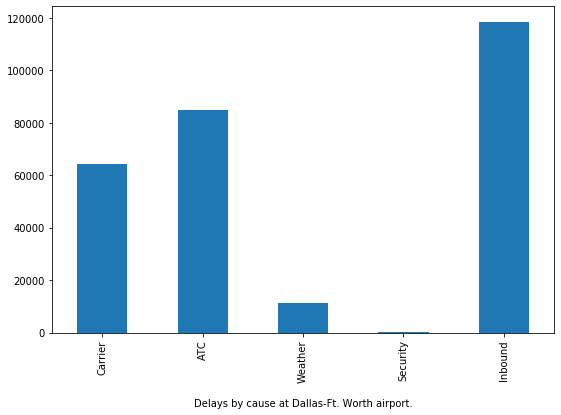

In [98]:
ax = dfw.transpose().plot.bar(figsize=(9, 6), legend=False)
ax.set_xlabel('\nDelays by cause at Dallas-Ft. Worth airport.');

Bar charts look like histograms, but they are not the same - in histograms bars are typically touching each other, which makes sense since the data is categorical.  In bar charts the bars typically don't touch, but in a grouped bar chart you'll see them touch.

Pie charts are an alternative to the bar chart, but are utter shit.  Don't use pie charts.  Horizontal bars kick the shit out of pie charts.

> **Numerical Data as Categorical Data**  
> In "Frequency Tables and Histograms", we looked at frequency tables based on binning the data.  This implicitly converts the numeric data into an ordered factor.  In this sense, histograms and bar charts are similar, except that the categories on the x-axis are not ordered.  Converting numeric data to categorical data is an important and widely used step in data analysis since it reduces the complexity (and size) of the data.  This aids in the discovery of relationships between the features, particularly in the early stages of an analysis.

### Mode

Mode is the most common value observed in a feature - for example, "Inbound" is the mode of cause of delay at DFW.  This is a summary statistic, and has little use outside of that

### Expected Value

We can look at a categorical expected value based on the following scenario.  Let the following table show the categories of service and proportion of sign-ups expected for attendees of a webinar offerred by a cloud services marketer:

|Tier             |Proportion     |
|-----------------|---------------|
|\$300 Level      |5%             |
|\$50 Level       |15%            |
|No Purchase      |80%            |

We can calculate the expected value of the marginal revenue per attendee as:  

$$EV = 300(0.05) + 50(0.15) + 0(0.80) = 22.50$$

This is a critical concept in Business Valuation and Capital Budgeting

### Probability

Probability is generally an intuitive concept.  It is the proportion of times an event cn be expected to occur over time.  This can be represented in frequency (an event happening 15% of the time) or as odds (common in sports - odds being 2-1 in favor mean that the probability is 2/3).  This is a fairly heavy concept which will not be discussed in depth here.

### Key Ideas

- Categorical Data is typically summed up in proportions, and can be visualized in a bar chart
- Categories might represent distinct things (apples and oranges, male and female), levels of a factor variable (low, medium, high), or numeric data that has been binned
- Expected value is the sum of values time the probability of their occurrence, often used to sum up factor variable levels

### Further Reading 
- No statistics course is complete without a [lesson on misleading graphs](https://en.wikipedia.org/wiki/Misleading_graph), which often involve bar charts and pie charts.

## Correlation

Many data science projects look at examining the correlation between predictors, as well as predictors and their target variables.  Positive correlation means that values of $Y$ go up with increasing values of $X$, and negatively correlated values of $Y$ go down with increasing values of $X$.

### Key Terms for Correlation
- **_Correlation Coefficient:_** A metric that measures the extent to which numeric values are associated with one another (ranges from -1 to +1)
- **_Correlation Matrix:_** A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables
- **_Scatterplot:_** A plot in which the x-axis is the value of one variable, and the y-axis is the value of another

For two variables:

$$v1: \{1, 2, 3\}  \\
v2: \{4, 5, 6\}$$

Taking the sums of the products of the values doesn't tell you much, but if you compute _Pearson's Correlation Coefficient_ you can get a more useful measure of correlation.  The computation is made by summing the products of the devations from the mean for var 1 and var 2, and dividing by the product of the standard deviations time $n - 1$:

$$r = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{(n-1)s_xs_y}$$

Here we will build a correlation matrix for telecoms in the S&P 500:

In [137]:
sp500_px = pd.read_csv('../data/sp500_px.csv')
sp500_px = sp500_px.set_index('Unnamed: 0')
sp500_px.index.name = None
sp500_sym = pd.read_csv('../data/sp500_sym.csv')

telecoms = sp500_px.loc[sp500_px.index > '2012-07-01',
                        sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']]

print(telecoms.corr().to_markdown())

|      |        T |      CTL |      FTR |       VZ |     LVLT |
|:-----|---------:|---------:|---------:|---------:|---------:|
| T    | 1        | 0.474683 | 0.327767 | 0.677612 | 0.278626 |
| CTL  | 0.474683 | 1        | 0.419757 | 0.416604 | 0.286665 |
| FTR  | 0.327767 | 0.419757 | 1        | 0.287386 | 0.260068 |
| VZ   | 0.677612 | 0.416604 | 0.287386 | 1        | 0.242199 |
| LVLT | 0.278626 | 0.286665 | 0.260068 | 0.242199 | 1        |


Here we will make a visualization in a heatmap of the correlations among EFTs:

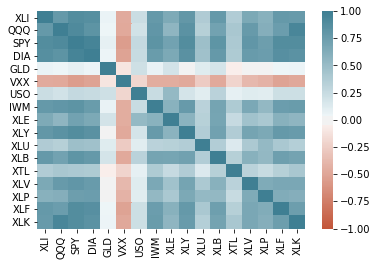

In [138]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

import seaborn as sns

sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True));

In both of these representations the diagonal is always 1 since a variable is always perfectly correlated with itself.  We see that the SPY (S&P) and DIA (Dow Jones) ETFs are highly positively correlated, as are QQQ and XLK, which are technology companies.  Defensive ETFs such as GLD (gold), USO (oil), and VXX (Market Volatility) are weakly or negatively correlated with the other ETFs.

### Scatterplots

Scatterplots provide a visual to examine relationships between two variables.  While a correlation coefficient is useful for quantifying a linear relationship,  a scatterplot can help reveal non-linear relationships.  The following plot looks at the correlation between movements in Verizon and AT&T stock:

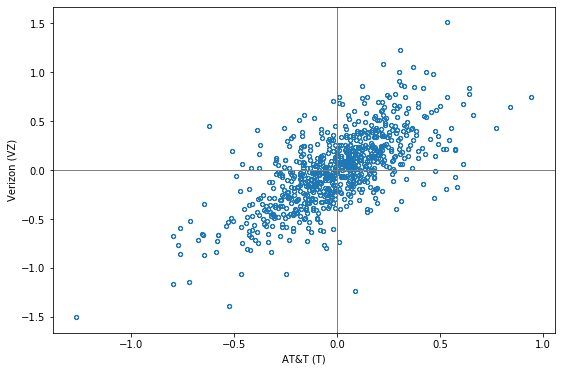

In [146]:
ax = telecoms.plot.scatter(x='T', y='VZ', figsize=(9,6), marker='$\u25EF$')
ax.set_xlabel('AT&T (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1);

We can see that on most days when Verizon moves up or down, AT&T does likewise.  The center of the plot is hard to read - hexbin and density plots will help to clear up the middle of the plot

## Exploring Two or More Variables



In [148]:
kc_tax = pd.read_csv('../data/kc_tax.csv')

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

kc_tax0.shape

(432693, 3)

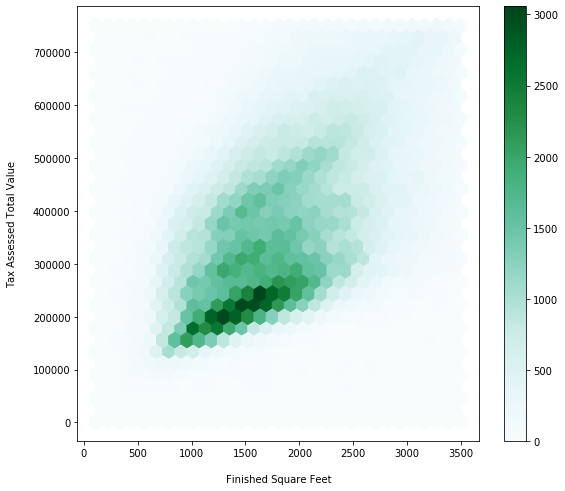

In [151]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(9, 8))
ax.set_xlabel('\nFinished Square Feet')
ax.set_ylabel('Tax Assessed Total Value\n');

In [155]:
# These take forever to run - Don't.
# Run it in R - it does this better

# ax = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, n_levels=10, ax=ax)
# ax.set_xlabel('Finished Square Feet')
# ax.set_ylabel('Tax Assessed Value')

## Two Categorical Variables

Contingency Tables look like shit in python - use R

In [156]:
lc_loans = pd.read_csv('../data/lc_loans.csv')

crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)

In [157]:
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [165]:
df = crosstab.loc['A':'G',:].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

In [166]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [171]:
crosstab.append(perc_crosstab).sort_index()

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562.000000,50051.000000,20408.000000,469.000000,72490.000000
A,0.021548,0.690454,0.281528,0.006470,0.160746
All,22671.000000,321185.000000,97316.000000,9789.000000,450961.000000
B,5302.000000,93852.000000,31160.000000,2056.000000,132370.000000
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,6023.000000,88928.000000,23147.000000,2777.000000,120875.000000
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,5007.000000,53281.000000,13681.000000,2308.000000,74277.000000
D,0.067410,0.717328,0.184189,0.031073,0.164708


### Categorical and Numeric Data

We can examine the distribution of a numeric variable across many categories by using boxplots.  Here is an example of Daily Percentage of Delayed Flights by Airline:

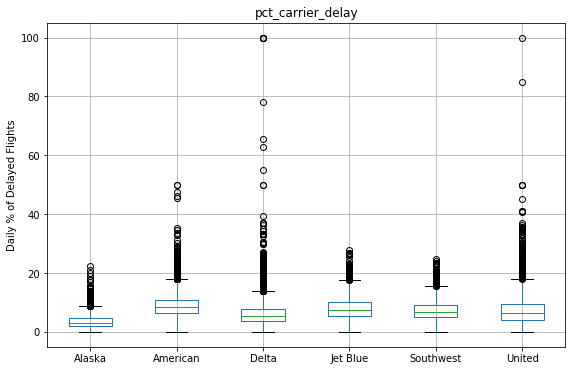

In [177]:
airline_stats = pd.read_csv('../data/airline_stats.csv')

ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay', figsize=(9,6))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('');

We can use violin plots to get a better idea of the nuance of a distribution, but outliers are not as well identified.

Text(0, 0.5, 'Daily % of Delayed Flights')

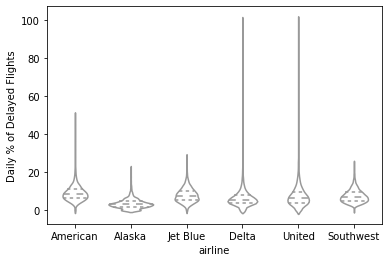

In [180]:
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
                    inner='quartile', color='white', figsize=(9,6))
ax.set_label(' ')
ax.set_ylabel('Daily % of Delayed Flights')

### Visualizing Multiple Variables

We can extend these methods for examining multiple vqriables through _conditioning_.  If we dive into the relationship between sqaure feet and assessed value, while conditioning for zip code, we can get a deeper look into how the relationship plays out.

In [181]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip.shape

(19690, 3)

In [182]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

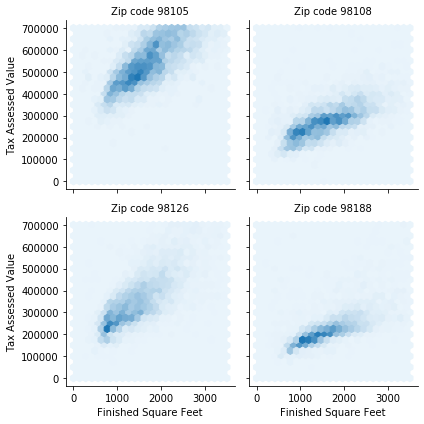

In [184]:
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}');